# Accumulation radar 2010-2014 - investigation
***
### Last update: January 18th, 2021 at 12h00


## Tasks to do after meeting with Andrew on December 14th 2020:

1. Fix the surface picking issue
    - <font color='green'>Done</font> (manualy forcing for potential ice slabs areas)
2. Assess the influence of roll correction on traces, and how important it is
    - <font color='green'>Done</font> (see herebelow)
3. Assess the influence of depth correction on traces, and how important it is
    - <font color='green'>Done</font> (see herebelow)
4. Investigate individual 2002-2003 trace manually and tick the area where you think there might be ice slabs:
    - Get yourself familiar with how does ice slabs and lenses look like in 2010/2014 data:
        - <font color='green'>Done</font> (see herebelow)
    - Find a function that allows me to log the location of ice lens in an image by clicking on it in python:
        - <font color='green'>Done</font>, the function is ready to be used
    - Go in the 2002/2003 dataset and identify the ice lenses/refreezing layers:
        - <font color='red'>Not done</font>

5. Write the methods before going to holidays!
    - <font color='green'>Done</font>

## I. Summary:
1. Fix surface picking issue
2. Making the eye familiar with ice slabs in the 2010-2014 dataset
3. Assessing the importance of roll corretion
4. Assessing the importance of depth correction
5. Checking the surface identified by MacFerrin
6. Show slices with potential ice slabs in it (raw slices and cutted slices)

### Import libraires

In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from os import listdir
from os.path import isfile, join
import os

## 1. Fix surface picking issue

<img src="2002_2003_radar_slice/may30_02_2_improved_surfpick_raw.png">

## 2. Making the eye familiar with ice slabs in the 2010-2014 dataset
I choose to have a look at the images before the roll correction. Here below are shown several images of traces in the dataset 2010-2014.

### Important notes:
- 'ORIGINAL' stands for the display of the slice using the original indices for picking the surface (the one furnished with the data by default), while 'BESTFIT_V1' and 'BESTFIT' stands for the plot of the radar slice using the improved indices from the surface picking improvement procedure defined in the code!
- Investigation of the difference in colorshade between `_0m_30m_BESTFIT_V1` and `_5m_30m_ORIGINAL` with `_ROLLCORRECT__BEFORE` and later figures:
    - When we create the figures `_0m_30m_BESTFIT_V1` and `_5m_30m_ORIGINAL`, we input the traces in refill_array with the mask 'surface_maskname', which is `ICEBRIDGE_EXCLUSIONS_SURFACE_PICK_FILE` coming from GPR_FileData.py, which is the file `Exclusions_SURFACE_PICKS.txt`
    - When we create the figure `_ROLLCORRECT__BEFORE` and later figures, we input the traces in refill_array with the mask 'trace_masks', which is `[ICEBRIDGE_EXCLUSIONS_SURFACE_PICK_FILE,ICEBRIDGE_EXCLUSIONS_SURFACE_MISMATCH_FILE,ICEBRIDGE_EXCLUSIONS_LAKES_OTHER_FILE]` coming from GPR_FileData.py, which are the files `Exclusions_SURFACE_PICKS.txt`, `SURFACE_MISMATCH_EXCLUSIONS.txt`, and `LAKES_AND_OTHER_EXCLUSIONS.txt`.
    My conclusion is that there are more exclusions in the figure `_ROLLCORRECT__BEFORE` and later figures compared to  `_0m_30m_BESTFIT_V1` and `_5m_30m_ORIGINAL`, meaning that we probably exclude very bright and/or very dark regions, rendering the figures in the former case less polluted by erroneous signal, this more clear for visualisation.

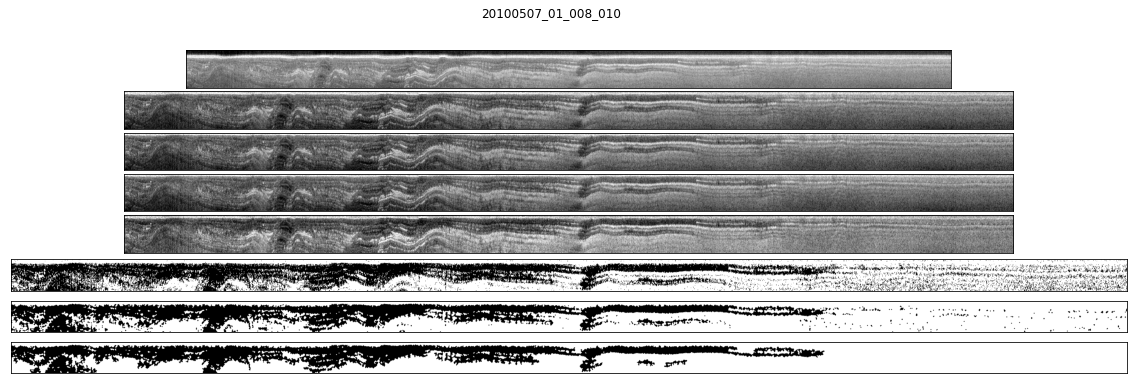

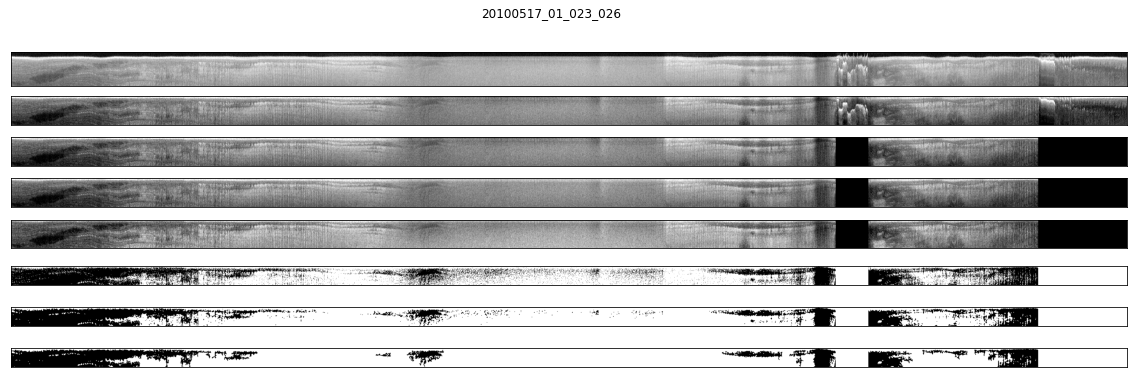

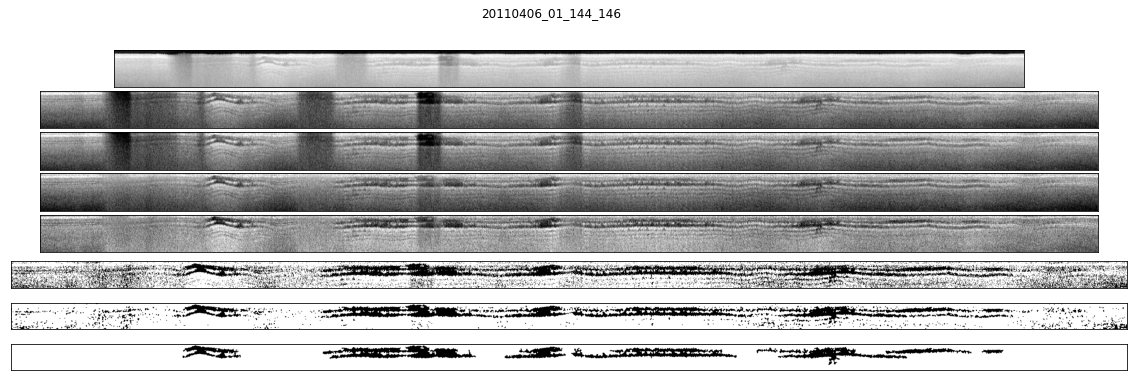

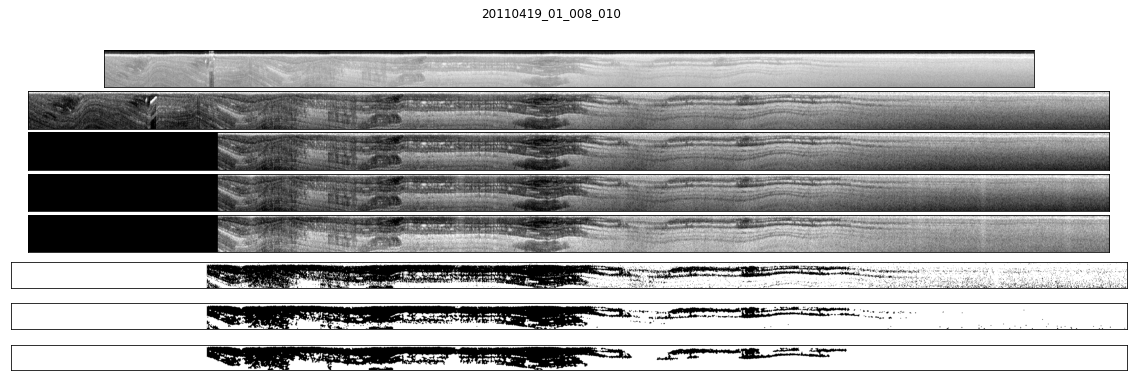

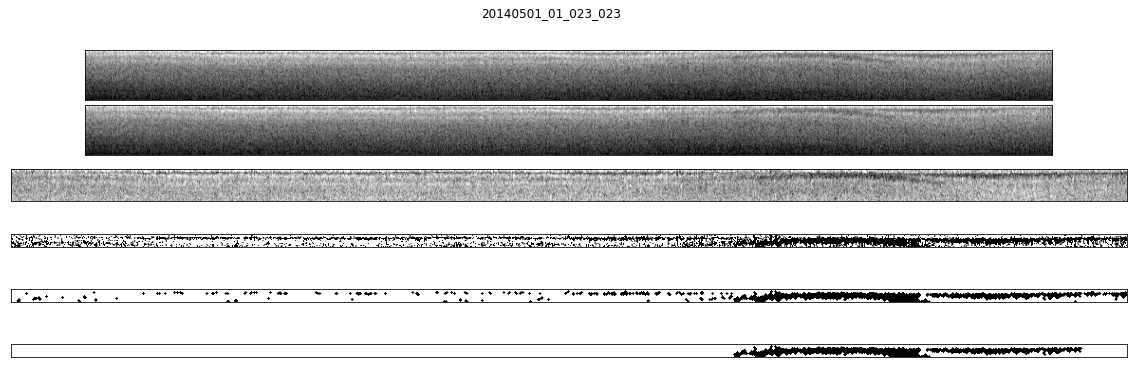

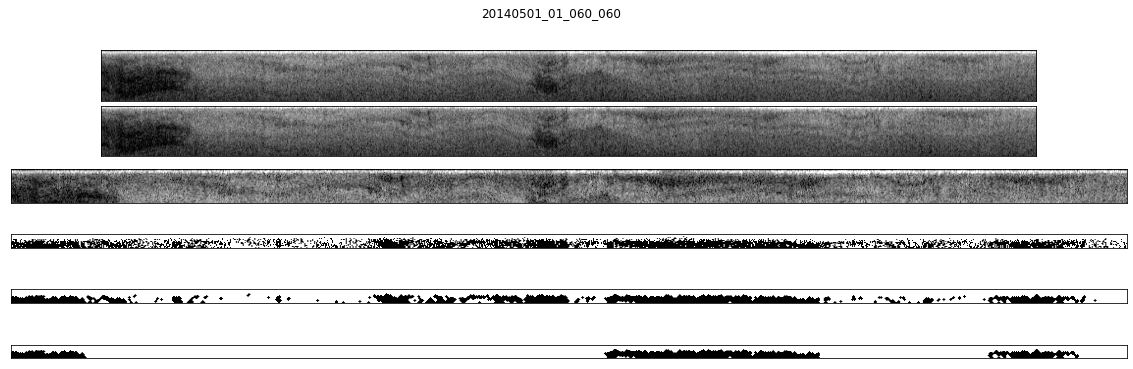

In [3]:
#Define the files location
path= 'C:/Users/jullienn/Documents/working_environment/iceslabs_MacFerrin/icelens_identification'
folder_days = [f.name for f in os.scandir(path) if f.is_dir() ]

for day in folder_days:
    path_day=path+'/'+day
    #onlyfiles = [f for f in listdir(path_day) if isfile(join(path_day, f))]
    if (day=='potential_iceslabs'):
        continue
    if (day[0:4]=='2014'):
        #Prepapre the figure
        fig, axs = plt.subplots(6,1, figsize=(20, 6), facecolor='w', edgecolor='k')
        fig.suptitle(day)
        fig.subplots_adjust(hspace = .1, wspace=.001)
        axs = axs.ravel()

        #Load and plot images

        #_5m_30m_ORIGINAL: does not exist for 2014
        
        #BESTFIT_V1: does not exist for 2014
        
        #Before roll correction
        ROLLCORRECT__BEFORE = Image.open(path_day+'/'+day+'_ROLLCORRECT__BEFORE.png').convert("L")
        arr_ROLLCORRECT__BEFORE = np.asarray(ROLLCORRECT__BEFORE)
        axs[0].imshow(arr_ROLLCORRECT__BEFORE, cmap='gray', vmin=0, vmax=255)

        #After roll correction
        ROLLCORRECT_AFTER = Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")
        arr_ROLLCORRECT_AFTER = np.asarray(ROLLCORRECT_AFTER)
        axs[1].imshow(arr_ROLLCORRECT_AFTER, cmap='gray', vmin=0, vmax=255)

        #After depth correction
        XDEPTHCORRECT_AFTER = Image.open(path_day+'/'+day+'_XDEPTHCORRECT_AFTER.png').convert("L")
        arr_XDEPTHCORRECT_AFTER = np.asarray(XDEPTHCORRECT_AFTER)
        axs[2].imshow(arr_XDEPTHCORRECT_AFTER, cmap='gray', vmin=0, vmax=255)

        #orig_CUTOFF_045_THRESHOLD_000
        orig_CUTOFF_045_THRESHOLD_000 = Image.open(path_day+'/'+day+'_orig_CUTOFF_-0.45_THRESHOLD_000.png').convert("L")
        arr_orig_CUTOFF_045_THRESHOLD_000 = np.asarray(orig_CUTOFF_045_THRESHOLD_000)
        axs[3].imshow(arr_orig_CUTOFF_045_THRESHOLD_000, cmap='gray', vmin=0, vmax=255)

        #SG1_CUTOFF_045_THRESHOLD_000
        SG1_CUTOFF_045_THRESHOLD_000 = Image.open(path_day+'/'+day+'_SG1_CUTOFF_-0.45_THRESHOLD_000.png').convert("L")
        arr_SG1_CUTOFF_045_THRESHOLD_000 = np.asarray(SG1_CUTOFF_045_THRESHOLD_000)
        axs[4].imshow(arr_SG1_CUTOFF_045_THRESHOLD_000, cmap='gray', vmin=0, vmax=255)

        #SG1_CUTOFF_045_THRESHOLD_350
        SG1_CUTOFF_045_THRESHOLD_350 = Image.open(path_day+'/'+day+'_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")
        arr_SG1_CUTOFF_045_THRESHOLD_350 = np.asarray(SG1_CUTOFF_045_THRESHOLD_350)
        axs[5].imshow(arr_SG1_CUTOFF_045_THRESHOLD_350, cmap='gray', vmin=0, vmax=255)

        #Remove axis ticks
        plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
        
    else:
        #Prepapre the figure
        fig, axs = plt.subplots(8,1, figsize=(20, 6), facecolor='w', edgecolor='k')
        fig.suptitle(day)
        fig.subplots_adjust(hspace = .1, wspace=.001)
        axs = axs.ravel()

        #Load and plot images

        #_5m_30m_ORIGINAL
        _5m_30m_ORIGINAL = Image.open(path_day+'/'+day+'_5m_30m_ORIGINAL.png').convert("L")
        arr_5m_30m_ORIGINAL = np.asarray(_5m_30m_ORIGINAL)
        axs[0].imshow(arr_5m_30m_ORIGINAL, cmap='gray', vmin=0, vmax=255)

        #BESTFIT_V1
        BESTFIT_V1 = Image.open(path_day+'/'+day+'_0m_30m_BESTFIT_V1.png').convert("L")
        arr_BESTFIT_V1 = np.asarray(BESTFIT_V1)
        axs[1].imshow(arr_BESTFIT_V1, cmap='gray', vmin=0, vmax=255)

        #Before roll correction
        ROLLCORRECT__BEFORE = Image.open(path_day+'/'+day+'_ROLLCORRECT__BEFORE.png').convert("L")
        arr_ROLLCORRECT__BEFORE = np.asarray(ROLLCORRECT__BEFORE)
        axs[2].imshow(arr_ROLLCORRECT__BEFORE, cmap='gray', vmin=0, vmax=255)

        #After roll correction
        ROLLCORRECT_AFTER = Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")
        arr_ROLLCORRECT_AFTER = np.asarray(ROLLCORRECT_AFTER)
        axs[3].imshow(arr_ROLLCORRECT_AFTER, cmap='gray', vmin=0, vmax=255)

        #After depth correction
        XDEPTHCORRECT_AFTER = Image.open(path_day+'/'+day+'_XDEPTHCORRECT_AFTER.png').convert("L")
        arr_XDEPTHCORRECT_AFTER = np.asarray(XDEPTHCORRECT_AFTER)
        axs[4].imshow(arr_XDEPTHCORRECT_AFTER, cmap='gray', vmin=0, vmax=255)

        #orig_CUTOFF_045_THRESHOLD_000
        orig_CUTOFF_045_THRESHOLD_000 = Image.open(path_day+'/'+day+'_orig_CUTOFF_-0.45_THRESHOLD_000.png').convert("L")
        arr_orig_CUTOFF_045_THRESHOLD_000 = np.asarray(orig_CUTOFF_045_THRESHOLD_000)
        axs[5].imshow(arr_orig_CUTOFF_045_THRESHOLD_000, cmap='gray', vmin=0, vmax=255)

        #SG1_CUTOFF_045_THRESHOLD_000
        SG1_CUTOFF_045_THRESHOLD_000 = Image.open(path_day+'/'+day+'_SG1_CUTOFF_-0.45_THRESHOLD_000.png').convert("L")
        arr_SG1_CUTOFF_045_THRESHOLD_000 = np.asarray(SG1_CUTOFF_045_THRESHOLD_000)
        axs[6].imshow(arr_SG1_CUTOFF_045_THRESHOLD_000, cmap='gray', vmin=0, vmax=255)

        #SG1_CUTOFF_045_THRESHOLD_350
        SG1_CUTOFF_045_THRESHOLD_350 = Image.open(path_day+'/'+day+'_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")
        arr_SG1_CUTOFF_045_THRESHOLD_350 = np.asarray(SG1_CUTOFF_045_THRESHOLD_350)
        axs[7].imshow(arr_SG1_CUTOFF_045_THRESHOLD_350, cmap='gray', vmin=0, vmax=255)

        #Remove axis ticks
        plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);


Clearly ice slabs can be identified as the black features. Procedure looks to somehow fail for 2014.
## 3. Assessing the importance of roll corretion

Among my 2010-2014 subdataset, the traces '20110406_01_144_146' are the one showing strongest roll variation (from 0 to 20°). I choose this trace to illustrate the importance of roll correction on the data. This is also the same as the one chosen by MacFerrin et al., 2019 to illustrate his workflow on the supplentary material. I show also the traces '20100517_02_023_026'.

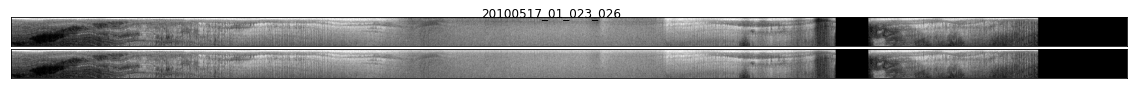

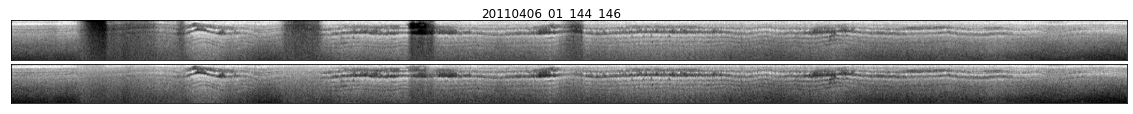

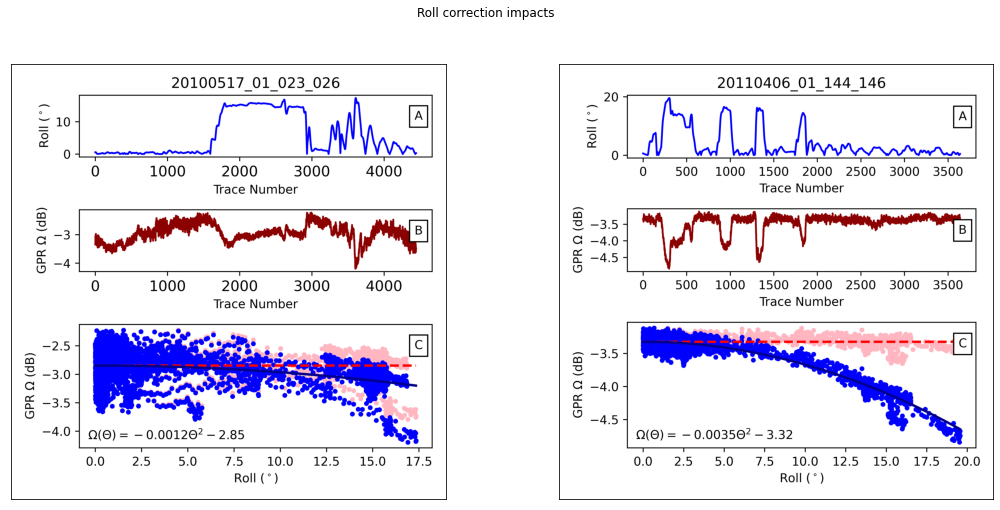

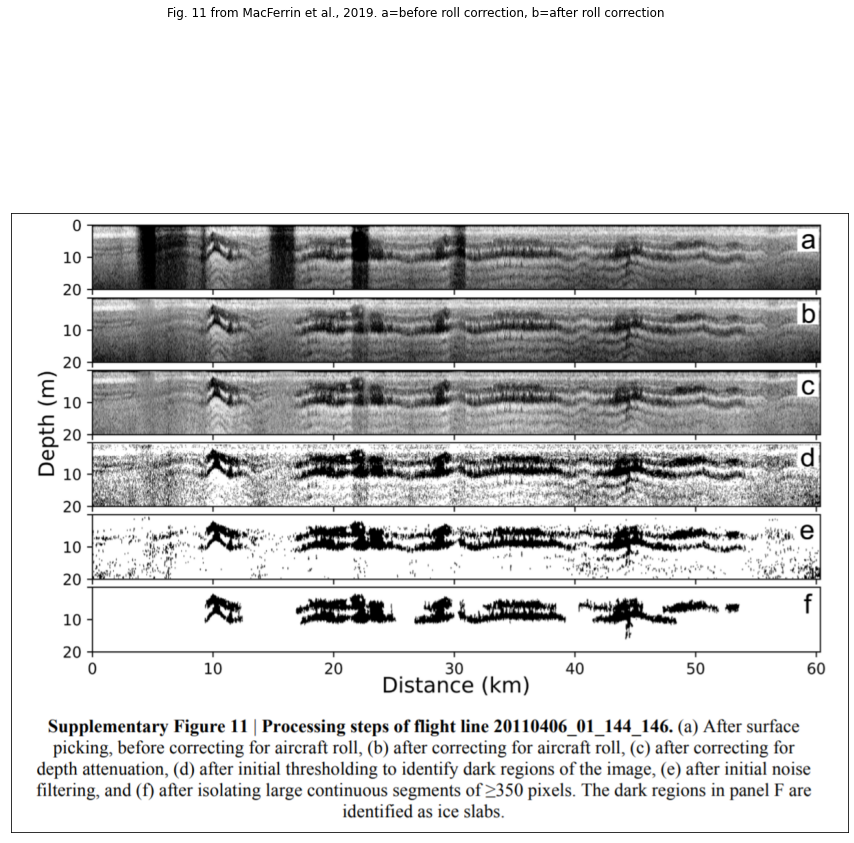

In [16]:
day='20100517_01_023_026'
path_day=path+'/'+day

#Prepapre the figure
fig, axs = plt.subplots(2,1, figsize=(20, 1.2), facecolor='w', edgecolor='k')
fig.suptitle(day)
fig.subplots_adjust(hspace = .001, wspace=.001)
axs = axs.ravel()

#Before roll correction
axs[0].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT__BEFORE.png').convert("L")), cmap='gray', vmin=0, vmax=255)
#After roll correction
axs[1].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

#Load roll correction impact figure
plt_roll_corr_20100517_01_023_026=mpimg.imread(path_day+'/'+day+'_PLOT_ROLLCORRECT_20m.png')


day='20110406_01_144_146'
path_day=path+'/'+day

#Prepapre the figure
fig, axs = plt.subplots(2,1, figsize=(20, 1.6), facecolor='w', edgecolor='k')
fig.suptitle(day)
fig.subplots_adjust(hspace = .001, wspace=.001)
axs = axs.ravel()

#Before roll correction
axs[0].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT__BEFORE.png').convert("L")), cmap='gray', vmin=0, vmax=255)
#After roll correction
axs[1].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

#Load roll correction impact figure
plt_roll_corr_20110406_01_144_146=mpimg.imread(path_day+'/'+day+'_PLOT_ROLLCORRECT_20m.png')


#Plot roll correction impact images
#Prepare the figure
fig, axs = plt.subplots(1,2, figsize=(18, 8))#, facecolor='w', edgecolor='k')
fig.suptitle('Roll correction impacts')
#fig.subplots_adjust(hspace = .1, wspace=.1)
axs = axs.ravel()

#Before roll correction
axs[0].imshow(plt_roll_corr_20100517_01_023_026)
axs[1].imshow(plt_roll_corr_20110406_01_144_146)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);


#Display Fig. 11 from supplementary materials from MacFerrin et al., 2019
fig11_MacFerrin=mpimg.imread(path+'/Fig11_supp_MacFerrin.png')

fig, ax = plt.subplots(figsize=(15, 15))
fig.suptitle('Fig. 11 from MacFerrin et al., 2019. a=before roll correction, b=after roll correction')
ax.imshow(fig11_MacFerrin)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

plt.show()

From MacFerrin et al., 2019 (supplemenatry materials):
- "Aircraft roll (especially above 5°) causes off-nadir reflections of the AR signal and weakens the
returned signal"
- "IceBridge AR signal strength is weakened most when the roll of the aircraft is greater than 5°"
- "Additionally, a roll-dependent weakening of the signal depends upon depth below the physical surface. Radar returns become weaker at depth regardless of aircraft roll. We performed a depth dependent roll-correction to accurately normalize the GPR data and negate roll-dependent weakening of the signal."
As far as I understood, the roll correction taked into account the influence of depth for correction the signal. However, there is an additional depth correction to consider (See point 3.).

The roll of the aircraft have the consequence to decrease the radar signal in the echogram. The roll correction aims to correct for this bias. Correction for air craft roll attenuate (if not erase) the darker regions in the traces. These vertical darker bands are sharp, thus well visible in raw data, and can be easily be identified.
#### Conclusion for roll correction: this can be ignored for 2002-2003 dataset as these bands can easily be identified, and does not prevent from identifying ice lenses/slabs.

## 4. Assessing the importance of depth correction because of depth attenuation

Among my 2010-2014 subdataset, I continue to show the traces '20110406_01_144_146'. I choose this trace to illustrate the importance of depth correction on the data. This is also the same as the one chosen by MacFerrin et al., 2019 to illustrate his workflow on the supplentary material. I show also the traces '20100507_01_008_010' rather than '20100517_02_023_026'. (the latter being used for roll correction illustration) because the influence is more striking for the former compared to the latter.

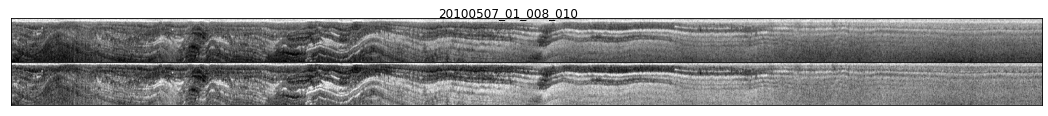

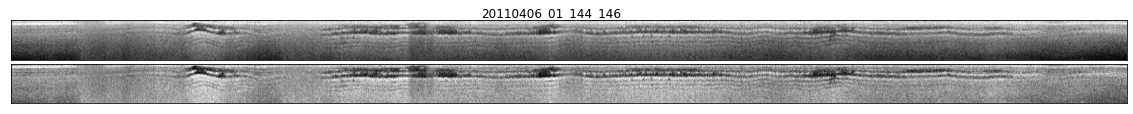

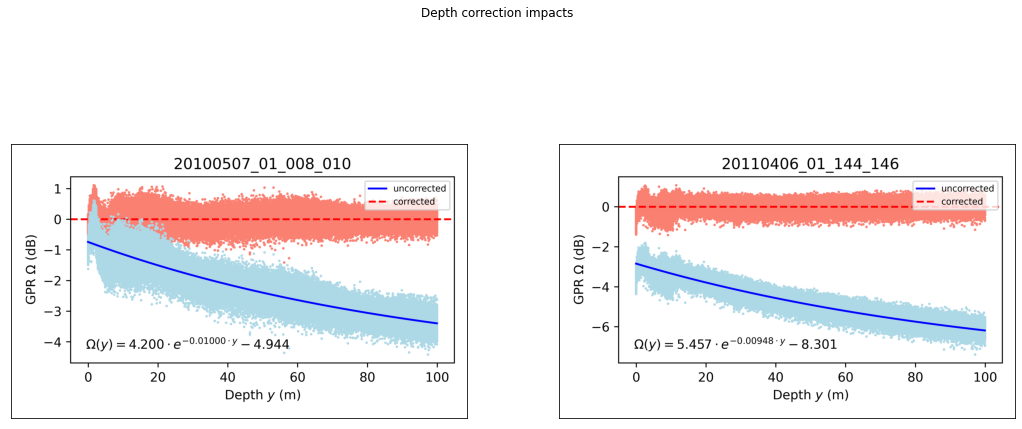

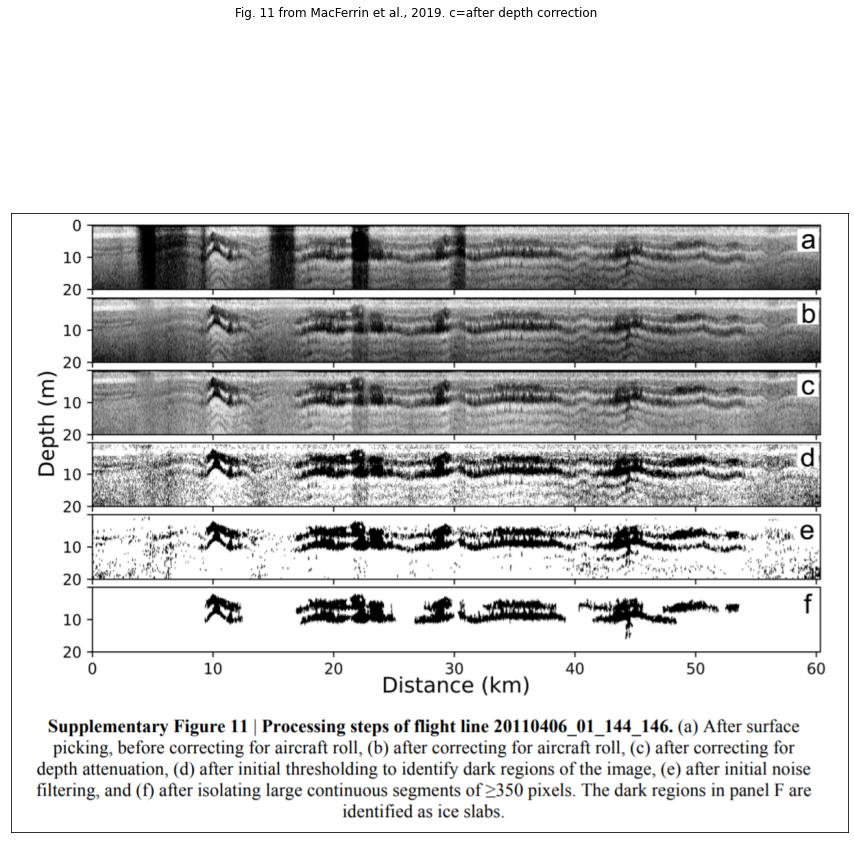

In [20]:
day='20100507_01_008_010'
path_day=path+'/'+day

#Prepapre the figure
fig, axs = plt.subplots(2,1, figsize=(20, 1.6), facecolor='w', edgecolor='k')
fig.suptitle(day)
fig.subplots_adjust(hspace = .001, wspace=.001)
axs = axs.ravel()

#Before depth correction
axs[0].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
#After depth correction
axs[1].imshow(np.asarray(Image.open(path_day+'/'+day+'_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

#Load depth correction impact figure
plt_depth_corr_20100507_01_008_010=mpimg.imread(path_day+'/'+day+'_DEPTH_CURVE_PLOT.png')


day='20110406_01_144_146'
path_day=path+'/'+day

#Prepapre the figure
fig, axs = plt.subplots(2,1, figsize=(20, 1.6), facecolor='w', edgecolor='k')
fig.suptitle(day)
fig.subplots_adjust(hspace = .001, wspace=.001)
axs = axs.ravel()

#Before depth correction
axs[0].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
#After depth correction
axs[1].imshow(np.asarray(Image.open(path_day+'/'+day+'_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

#Load depth correction impact figure
plt_depth_corr_20110406_01_144_146=mpimg.imread(path_day+'/'+day+'_DEPTH_CURVE_PLOT.png')


#Plot depth correction impact images
#Prepare the figure
fig, axs = plt.subplots(1,2, figsize=(18, 8))#, facecolor='w', edgecolor='k')
fig.suptitle('Depth correction impacts')
#fig.subplots_adjust(hspace = .1, wspace=.1)
axs = axs.ravel()

#Before depth correction
axs[0].imshow(plt_depth_corr_20100507_01_008_010)
axs[1].imshow(plt_depth_corr_20110406_01_144_146)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);


#Display again Fig. 11 from supplementary materials from MacFerrin et al., 2019
fig11_MacFerrin=mpimg.imread(path+'/Fig11_supp_MacFerrin.png')
fig, ax = plt.subplots(figsize=(15, 15))
fig.suptitle('Fig. 11 from MacFerrin et al., 2019. c=after depth correction')

ax.imshow(fig11_MacFerrin)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

plt.show()

See '20100507_01_008_010': The ice slabs at the subsurface at the second half on the right hand side is much darker after depth correction than before. As a general remark, the depth correction renders the top layer darkers and the bottom layers brighter as they were before the depth correction. Without depth correction, there might be a confusion of where the slabs are: one could argue that the are located to the bottom on the left hand side for '20100507_01_008_010' (see top subplot) whereas they are located to the top (see bottom subplot) (see also Fig.1). The signal is very clear for '20110406_01_144_146' and no confusion is possible.

From MacFerrin et al., 2019, supplementary materials:
- "AR return signals in firn and ice get weaker with depth, consistent with Beer’s Law for electromagnetic waves propagating through an attenuating medium49. To homogenize the radar  signal with respect to depth, we fit a scatterplot of the top 100 meters in each flight line to an exponential decay curve"


#### Conclusion for depth correction: there might be a confusion in identifying features as being ice lenses/slabs in some traces for not taking into account the attenuation of the signal with depth. One could miss ice slabs at the subsurface, and wrongly attribute deep features as being ice slabs. Knowing this bias, I think it should still be possible to roughly identify slabbing.

## 5. Checking the surface identified by MacFerrin
The goal here is to check if Mike takes the surface as being identified by the algorithm or if he is taking a few pixel above (or below) this identified surface. This is a question I ask to myself because it may influence of internal layering display on my plots (2002-2003). By going into the code, as far as I understood he does not do that! The slice is taken from the surface directly. Let's verify by displaying some figure from '20100507_01_008_010'.

5m_30m_ORIGINAL:
<img src="icelens_identification/20100507_01_008_010/20100507_01_008_010_5m_30m_ORIGINAL.png">

5m_30m_BESTFIT_DOTTED_LINE:
<img src="icelens_identification/20100507_01_008_010/20100507_01_008_010_5m_30m_BESTFIT_DOTTED_LINE.png">

0m_30m_BESTFIT_V1:
<img src="icelens_identification/20100507_01_008_010/20100507_01_008_010_0m_30m_BESTFIT_V1.png">

ROLLCORRECT__BEFORE:
<img src="icelens_identification/20100507_01_008_010/20100507_01_008_010_ROLLCORRECT__BEFORE.png">

It is difficult to spot that on the figures, but I would conclude that this is not the case. The bright surface remains here, and that is what matters in the question I am asking to myself!

### 6. Show slices with potential ice slabs in it (raw slices and cutted slices)

Thanks to this kind of plot, I have identified the areas where ice slabs are potentially present using Fig.2a) from MacFerrin et al., 2019. I have created a file storing all the dates and traces where I might expect ice slabs (file 'potential_iceslabs.txt' in folder '2002_2003_slice_and_loc').
<img src="2002_2003_slice_and_loc/jun04_02proc_4.mat.png">

#### 6.a Quick visualisation of raw slice radar signal in:   
1. Dry snow zone
<img src="2002_2003_slice_and_loc/not_scaled_slices/may11_03_27_aggregated.png">

2. Percolation zone
<img src="2002_2003_slice_and_loc/not_scaled_slices/may11_03_37_aggregated.png">

3. Ablation zone
<img src="2002_2003_slice_and_loc/not_scaled_slices/may11_03_40_aggregated.png">

It is important to note the variation of the signal strength:
1. Dry snow zone: [~ -3.2;~ +3.2]
2. Percolation zone: [~ -2.2;~ +2.7]
3. Ablation zone: [~ -4.4;~ +4.4]

#### 6.b Step to show slices:
1. Show raw radar signal. As just shown, the signal strength changes from trace to trace, thus not very useful for comparison between traces

<img src="2002_2003_slice_and_loc/not_scaled_slices/may12_03_36_aggregated.png">

2. Apply thresholding scaling procedure from MacFerrin et al., 2019 (_export_to_8bit_array) to be able to compare traces between each other. However we do not get rid of the signal vairiation betwwen the different traces!
    - Define the minimum and maximum ranges:
        - range_min = 0
        - range_max = 2**8 - 1
    - Choose the percentiles:
        - percentile_min = 0.5%
        - percentile_max = 99.5%
    - Scale the radar echogram:
        - export_array_rescaled = (array - percentile_min) / (percentile_max - percentile_min) * range_max
    - Round the scaled radar echogram to integer values
    - Saturate the top and bottom:
        - export_array_rescaled < range_min = range_min
        - export_array_rescaled > range_max = range_max

<img src="2002_2003_slice_and_loc/may12_03_36_aggregated.png">

3. The surface being too bright, I tried to remove it to make appear ice slabs in the subsurface. This is to what it looks like (see next figure: I selected a slice from 4 meters below the surface down to 30m. Note that the y ticks are not display correctly!). However, I find it not very optimal to remove the surface, so I decided to keep it. To make the subsurface more visible, I modify the percentiles in the scaling procedure so that the subsurface is more clear (though the surface colors are overshoot, but it does not matter so much).

<img src="2002_2003_slice_and_cutted_slice/may12_03_36_aggregated.png">

4. The 0.5-99.5% gave not very satisfying result to quickly spot iceslabs -> modify the threshold from 0.5-99.5% to 5-95% gives much more clear and easily spottable features:

<img src="2002_2003_slice_and_loc/may12_03_36_aggregated_5_95.png">

I have the feeling the last option seems to be enough to spot ice lenses/slabs while keeping the surface. I will keep this one. Maybe one can argue to play a bit with the threshold to optmize the display of the subsurface, but that's of second order matter.

#### 6.c Let's display some radar slices (0 to 30m), using the plotting procedure decribes in point 5.b.5. I focus on SW Greenland so far, and display several slices that stroked me by quick visualisation (non exhaustive list). I display 'slice_and_loc' figures:

<img src="2002_2003_slice_and_loc/jun04_02proc_4.mat_5_95.png">

<img src="2002_2003_slice_and_loc/may09_03_1_aggregated_5_95.png">

<img src="2002_2003_slice_and_loc/may11_03_12_aggregated_5_95.png">

<img src="2002_2003_slice_and_loc/may12_03_36_aggregated_5_95.png">

<img src="2002_2003_slice_and_loc/may12_03_41_aggregated_5_95.png">

<img src="2002_2003_slice_and_loc/may12_03_1_aggregated_5_95.png">

<img src="2002_2003_slice_and_loc/may12_03_2_aggregated_5_95.png">

### 8. Excess melt plot
I have plotted the excess melt MARv3.11.2-6km-ERA5. See file 'calculate_mar_excess_melt.txt' in C:\Users\jullienn\Documents\working_environment\excess_melt to know more about the excess melt calculations

I plot, for any traces, the location of the traces over the GrIS topography, the location of the traces over the excess melt of the previous year when  the track was acquired, and the 0-30m radar slice, color shading rescaled, without depth correction. Here are a few example for areas where I suspect ice slabs:

Start = left hand side
<img src="../excess_melt/figures_excess_melt/potential_iceslabs/year_2001_jun04_02proc_4.mat.png">

Start = left hand side
<img src="../excess_melt/figures_excess_melt/potential_iceslabs/year_2002_may09_03_1.png">

Start = right hand side
<img src="../excess_melt/figures_excess_melt/potential_iceslabs/year_2002_may12_03_36.png">

Start = left hand side
<img src="../excess_melt/figures_excess_melt/potential_iceslabs/year_2002_may12_03_1.png">

Start = left hand side
<img src="../excess_melt/figures_excess_melt/potential_iceslabs/year_2002_may12_03_2.png">


### Question to ask in the group meeting:
- After having had a look at the potential ice slabs excess melt plots, there might be a need to refine the 'potential_ice_slabs.txt' file. Consider potential ice slabs areas where excess melt is higher than 200 mm w.e./year?
- I would like to have the information related to the exess melt of the - let's say - 5 years before the data collection. How to do that? What about cumulative excess melt plot?

### 7. Check if the colorbar is not reversed between 2002-2003 and 2010-2014.
To do so, plot a 2010 trace with the procedure I developped. I plot the date 'Data_20100507_01_008_010'. The code to do that is named 'display_raw_2010_2014.py'. Here is the result:

<img src="icelens_identification/Data_20100507_01_008_010_plotted_with_my_procedure.png">

We can see that the surface is brighter, which indeed correspond to the surface I have identified in the 2002-2003 data.

### 8. Rescaling of the traces, yearly:
I created the code 'yearly_averaged_signal.py' where I can compute the xth percentile of all the traces belonging to either 2002 or 2003 (calculation of the percentiles for both years, separately). Here I present few of the results for the following percentiles:
- 25-75%
- 5-95%
- 2.5-97.5%
- 0.5-99-5%
The idea is to choose the percentile display that allow for ice lenses identification while having not too much noise in the background. Idealy the display would allow for spotting ice lenses without confunding them with the annual layering

### may09_03_1
#### 0.5-99.5%
<img src="rescale/2003/potential_iceslabs/may09_03_1_perc_05_995.png">

#### 2.5-97.5%
<img src="rescale/2003/potential_iceslabs/may09_03_1_perc_2p5_97p5.png">

#### 5-95%
<img src="rescale/2003/potential_iceslabs/may09_03_1_perc_5_95.png">

#### 25-75%
<img src="rescale/2003/potential_iceslabs/may09_03_1_perc_25_75.png">


### may12_03_1
#### 0.5-99.5%
<img src="rescale/2003/potential_iceslabs/may12_03_1_perc_05_995.png">

#### 2.5-97.5%
<img src="rescale/2003/potential_iceslabs/may12_03_1_perc_2p5_97p5.png">

#### 5-95%
<img src="rescale/2003/potential_iceslabs/may12_03_1_perc_5_95.png">

#### 25-75%
<img src="rescale/2003/potential_iceslabs/may12_03_1_perc_25_75.png">


### may12_03_36
#### 0.5-99.5%
<img src="rescale/2003/potential_iceslabs/may12_03_36_perc_05_995.png">

#### 2.5-97.5%
<img src="rescale/2003/potential_iceslabs/may12_03_36_perc_2p5_97p5.png">

#### 5-95%
<img src="rescale/2003/potential_iceslabs/may12_03_36_perc_5_95.png">

#### 25-75%
<img src="rescale/2003/potential_iceslabs/may12_03_36_perc_25_75.png">


This one this is pretty clear this is internal layering to me:

### may14_03_50
#### 0.5-99.5%
<img src="rescale/2003/potential_iceslabs/may14_03_50_perc_05_995.png">

#### 2.5-97.5%
<img src="rescale/2003/potential_iceslabs/may14_03_50_perc_2p5_97p5.png">

#### 5-95%
<img src="rescale/2003/potential_iceslabs/may14_03_50_perc_5_95.png">

#### 25-75%
<img src="rescale/2003/potential_iceslabs/may14_03_50_perc_25_75.png">

To do: investigate for 2002 without june04!!!

Herebelow is an example of the new figures I just created on Jan 26, 2020:
tracks localisation with radar slice, not depth corrected, with the colorscale scaled according to xth percentile (here 2.5% and 97.5%). The percentiles correspond to the xth percentile of all the radar signal in the slices that were identified as being potential ice slabs for a specific year. Here is an example with june04_2002_4 and may_12_03_26:

<img src="2002_2003_slice_and_loc_rescaled/jun04_02proc_4.matperc_2p5_97p5.png">

<img src="2002_2003_slice_and_loc_rescaled/may12_03_36perc_2p5_97p5.png">


#### Evidence of firn aquifers:

<img src="2002_2003_slice_and_loc_rescaled/jun04_02proc_9.matperc_2p5_97p5.png">



### 9. Dates I identified potential ice slabs by looking at radar slices after escaling percentiles 2.5% - 97.5%:
- Did not consider Jakobshavn
- Did only select obvious ice lensing
- jun04_02_4
- jun04_02_52
- jun04_02_53
- may09_03_0
- may09_03_1
- may09_03_30
- may09_03_37
- may09_03_41
- may11_03_21
- may12_03_1
- may12_03_2
- may12_03_36
- may12_03_41
- may12_03_42
- may13_03_4
- may13_03_29 (see end may13_03 and begining 14_03).
- may14_03_7 is an interesting one: begining does not have ice slabs, while middle yes. If you compare with MacFerrin et al., 2019's ice slabs, there is light evidence of slabbing. There might be the potential to show upward migration of ice lenses!
- may14_03_8 ?
- may14_03_21
- may14_03_51?
- may_15_03_0
- may_15_03_1
- may_15_03_2
- may_15_03_4
- Going from dry snow zone to percolation zone without ice lensing: may15_03_28. And the other wa around: may15_03_29
- may15_03_37: toward the end
- may18_02_0: lensing? of dry snow zone?
- may18_02_27: interesting features: it should not be ice lensing though it looks very similar
- may24_02_25
- may30_02_51
- NW Greenland: I think the lensing did not started yes in 2002-2003!


### 10. Comparison of individual traces: overlap over two years (2002-2003). All this below are all the possible match I found for ice slabs!
To do such things I used the code I created 'comparison_2_dates.py'

#### jun04_02_4 VS may12_03_36: evidence of lenses, no evidence of lenses thickening!

<img src="comparison_overlap_years/jun04_02_4.png">
<img src="comparison_overlap_years/may12_03_36.png">

#### may18_02_0 VS may14_03_51: little evidence of lenses presence,  no evidence of lenses thickening

<img src="comparison_overlap_years/may18_02_0.png">
<img src="comparison_overlap_years/may14_03_51.png">

#### Not conclusive because of may30_02_51's bad quality:
- may30_02_51 VS may13_03_29
- may30_02_51 VS may14_03_51
- may30_02_51 VS may15_03_37

#### may18_02_0 VS may13_03_29: little evidence of lenses presence, no evidence of lenses thickening

#### may18_02_0 (end) VS may15_03_37 (begining): difficult to judge, but to me little evidence of lenses presence

#### Difficult to judge because of the poor quality of may24_02_25:
- may24_02_25 VS may13_03_29

#### Not at the exact same location:
- may24_02_25 VS may15_03_37
- may24_02_25 VS may14_03_51
- jun04_02_52 begining VS may12_03_1 end

The begining of both traces, not so much in here
<img src="comparison_overlap_years/jun04_02_53.png">
<img src="comparison_overlap_years/may12_03_1.png">

#### How to differentiate ice lenses VS internal layering? To me, it looks that the transition around the layer matters:
- Internal layering: the transition looks to be gradual (the range of color scale seems to increase and decrease quite uniformly). Example: see the figure from may12_03_26
- Ice lenses: the transition is much more sharp, with less uniformity in the range of color seen. Example: see the figure from may14_03_50

Might be a few cores before 2001 to use? Not sure at all...
- Top priority: from Vandecrux et al., 2019 I can use the SUMup database!!!
- Second top priority: https://instaar.colorado.edu/uploads/occasional-papers/OP60_Harper_et_al.pdf : There might be some comparison possible!!! The excel file related to the different cores is available. The cores are located above Jakobshavn glacier, where I might have some flight not very far away! Start by looking above 1500m a.s.l.
- https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2001JD900153
- https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1029/2008JD011208 : eventually one close to Jakoshavn Isbrae?
- https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2000GL012052 enore moins sur pour celui là

Already some metl feature seen in SW Greenland above 2000m a.s.l.:
file:///C:/Users/jullienn/Downloads/melt-features-in-ice-cores-from-site-j-southern-greenland-some-implications-for-summer-climate-since-ad-1550.pdf

I had a look at the SUMup database, and by filtering the data to display only what is present in SW Greenland, I found the following firn cores that were drilled in the percolation zone where there is ice slabs according to MacFerrin et al., 2019:
- date = 20080518, lat=69.6874, lon=-48,4997, citation=49, max firn core depth= 10m
- date = 20080522, lat=69.725, lon=-48,1902, citation = 49, max firn depth=10m
- date= 20080521, lat=69.7062, lon=-48,345, citation=49, max firn depth=10m
- date= 20080521, lat=69.7198, lon=-48,2674, citation=49, max firn depth=10m
- 2X date= 20080527, lat=69.7391, lon=-48.2403, citation=49, max firn depth=10m
- date= 20080527, lat=69.7391, lon=-48.2403, citation=49, max firn depth=11m
- date= 20080524, lat=69.738, lon=-48,061, citation=49, max firn depth=10m
- date= 20070628, lat=69.738, lon=-48,061, citation=49, max firn depth=10m

### 10. Replies from Veit and Nanna about whether the features we see as are lenses or not.

Basically 3 candidates were possible for the features we see: liquid water, hardened surface, ice slabs:
- Liquid water = no. Looking af Fig. 18 from Karlsson et al., 2019, the first peak of radar signal associated with the surface goes toward large positive, then negative, while the first peak associated with liquid water goes toward negative, then positive. Looking at the figure I created for jun 04 2002 n°4, both the first surface peak associated with the surface and the first peak associated with the burried feature go toward positive values. Furthermore, liquid water would cause a complete reflection of the signal leading to a reduced signal in the snow below the water table, whoch is not the case in my plots.

- Harneded layer = no. Hardened surface is associated with high winds thar harden the surface. According to Nanna, if the thickness of the signal correspond to multiple year of accumulation, it is not likely a burried surface. Based on values I prodived, Nanna have calculated an annual accumulation of ~0.3 to 1.3m. 1.3m would correspond with very high accumulation and low densities. The feature we are looking at looks to be quite thicker than what cam be depositied in one year. Furthermore, if hardening of layer takes place, it should be active over several years during repited accumulation events, which is very unlikely given the gentle slope of the area. Andrew have confirmed on the very unlikely possibility that this signal correspond tot hardened layers.

- Ice lenses!

Here are all the emails I got associated with this investigation.
- Veit, on Jan 22:

'To me in both cases you see a bright reflection which is a clear hint for a strong dielectric contrast, which can be interpreted as ice lense. Here one could try to check using true amplitudes if the reflection is caused by a dielectric contrast between ice and snow. In both cases you see sporadic high reflection features in different depths, which also points to refreezing features such as ice slabes.
It also seems to me that the area you identified as ice lense area in 2002, the penetration is higher than to the left and right, as you see more internal layering. This is different to 2010.
What is the reason? Maybe a strong last summer surface prevents a deeper penetration int the upslope area?.
 
What is the flight  direction of the 2010 profile left --> right = upslope?
 
 
The old data looks more noisy. 
Did you check if the system characteristics of the system were identical in 2002 and 2010?
I guess 2010 is more powerful or maybe also the center frequency and bandwidth is different, as you see more penetration in general.
Maybe you can provide a table.
Furthermore we need to check if 2010 was differently processed than 2002 - e.g. SAR processed or not. 
 
 
In general I would say that the features you identified in 2002 are similar to the 2010 and I'm not aware of other geophysical features to produce such patterns.
I'm curios to listen to Nanna, as she has more experience in interpreting radargrams.'

- Nanna, on Jan 28

'A couple of thoughts: There are three candidates to what could cause this kind of signal
1.	Ice slabs
2.	Liquid water
3.	Hardened buried surface
From the radargram you sent, we cannot immediately rule out any of these. So, let us consider each in more detail:
Liquid water: is perhaps the easiest to check for. Typically, liquid water would cause a reversal (mirror) of the signal. I attach a figure from my 2019 publication showing an example of how liquid water changes the signal. As you see on the figure, the surface signal has the first large amplitude to the right, whereas the buried liquid water has the first large amplitude to the left. I couldn’t find the raw data on the CRESIS website, so I couldn’t check but perhaps you can send me a link, Nicolas? Or you can have a look yourself at the individual signal traces. 
Hardened buried surface: This is trickier, as its signal is not very different from an ice slab. The question is: what is the slope of the surface on the region? Do we have reason to believe that it suffers from high winds that could harden the surface? Also, what is the annual accumulation? Does the thickness of the signal correspond to multiple years of accumulation? Because in that case I would say it is unlikely to be a buried surface.
That leaves us with ice slabs. Seems like a good explanation to me. I am not overly concerned that the ice slab in the data appear dark rather than white. That is probably a function of the system design and that has definitely changed between 2002 and 2010.'

- Nanna, on Feb 4:

'Hi Nicolas,
Thank you for the very thorough replies to my questions. Let us go through the options once again with the new information you provided:
 
Liquid water: I think it is very unlikely that the signals are caused by liquid water. Firstly, your figures clearly show that there is no mirroring of the signal as one would expect from a water surface. Secondly, there is also a clear second signal (at 22m) below the first, where typically liquid water would cause a complete reflection of the signal leading to a reduced signal in the snow below the water table. 
 
Hardened surface: This is a little bit more tricky to ascertain but based on the values you provide for accumulation and assuming that densities lie somewhere in the range between 400kg/m3 and 600kg/m3, I can estimate an approximate thickness for annual layering. I find that an annual snow layer would be between 0,3m and 1,3m thick. In comparison, the signal we see in the radar is at least 1 m but probably more. Thus, the thickness of the radar slab is only similar in thickness to annual snow deposition for low density and high accumulation. In most scenarios, the radar slab is quite a bit thicker than what is deposited during one year. If it is a hardened remnant surface, then this process must be active over several years repeatedly through multiple accumulation events. I find that unlikely especially given the low surface slope. Perhaps Andrew and Veit you want to comment on this? 
 
So, I think that leaves us with the conclusion that the most likely explanation is indeed an ice lense! '

- Andrew, on Feb 4:

'Hi all,
Nanna and Veit, thanks a lot for your insights on all of this, hugely appreciated, it's great to be learning something new here. I certainly concur with the conclusion that the most likely explanation is ice lensing. Regarding the hardened surface, a look at the 1958-2010 MAR mean modelled SMB for this region indicates ~100-300 mm w.e. a-1 (compare to Nicolas' accumulation estimates below; Fettweis et al 2017 TC) - which makes me even more confident that hardened surfaces cannot be the answer. And I certainly can't conceptualise the process for making a hardened surface of the magnitude that the numbers suggest.'



### 11. Investigation on the bug of 2012 and 2013 data processing.
The bug is the following: the depth are negative, because the time variable is itself negative. I have investigated that to know why. I plotted the time variable associated with some data of 2012 and 2013, and found that the increase of the time at each step is constant, i.e. the time increases linearly. I compare the time variable stored in 2010, 2011, 2012, 2013 and 2014 data. See figures below.

### Correct ones
#### 2010 - example with 20100508_01_114_115 :
<img src="investigation_2012_2013_bug/2010_time_example.png">
20100508_01_114_115, the time variable increases linearly as a function of the depth, and is always positive.

#### 2011 - example with 20110419_01_008_010 :
<img src="investigation_2012_2013_bug/2011_time_example.png">
20110419_01_008_010, the time variable increases linearly as a function of the depth, and is always positive.
#### 2014:
Not for now

### Erroneous ones
#### 2012:

<img src="investigation_2012_2013_bug/2012_time_example.png">
20120418_01_129_131, the time variable increases linearly as a function of the depth, but is not always positive.

More in details for 20120418_01_129, the time variable passes the zero between i=543 and i=544. For i<543: time<0, for i>544, time>0. However, the time increases linearly as a function of the depth. To me, choosing the time=0 as a start for depth definition should work.
<img src="investigation_2012_2013_bug/2012_example.png">

#### 2013:

<img src="investigation_2012_2013_bug/2013_time_example.png">
20130405_01_165_167, the time variable increases linearly as a function of the depth, but is not always positive.

More in details for 20130405_01_165, the time variable is equal to zero at i=614. For i<614: time<0, for i>614, time>0. However, the time increases linearly as a function of the depth. To me, choosing the time=0 as a start for depth definition should work.
<img src="investigation_2012_2013_bug/2013_example.png">

#### Conclusion: In order that calculation works, I should code something so that the time[0]=0 and goes toward positive values.

#### Solution I found to overcome this issue: while calculating the SAMPLE_DEPTHS, if SAMPLE_DEPTHS[10]<0, then SAMPLE_DEPTHS=SAMPLE_DEPTHS+abs(SAMPLE_DEPTHS[0]). I show that is works for several test data. I show only the final ice slabs results:

#### 2012 examples:

Let's have a look at one example for 2012:
Traces after depth correction are exactly the same. Final ice slabs result are not exactly the same.


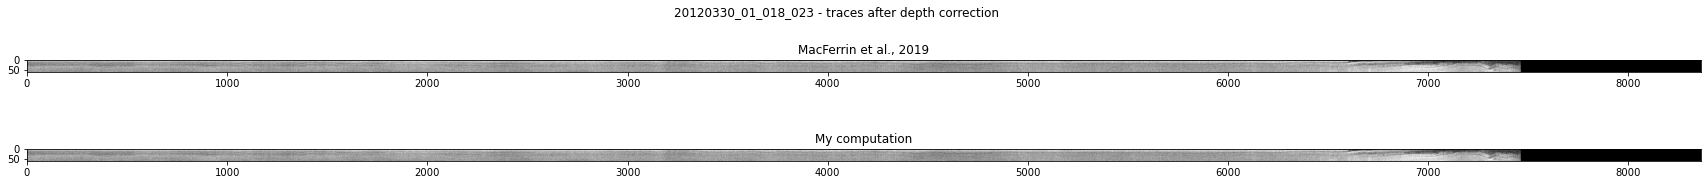

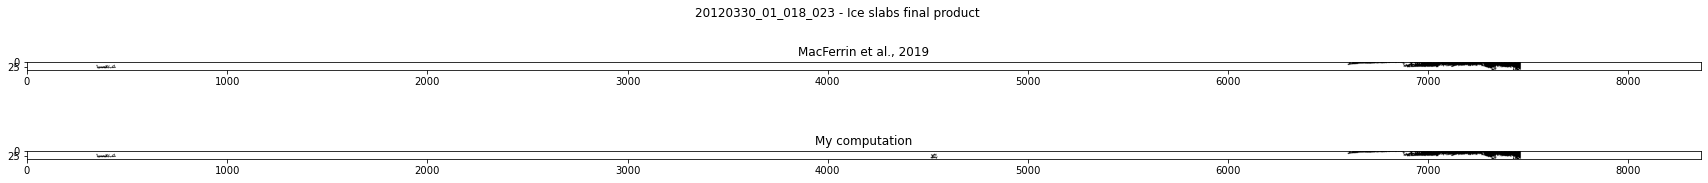

In [3]:
#Define paths
path_MacFerrin_depth_corrected='C:/Users/jullienn/Documents/backup_lab_computer/documents/MacFerrin_FigShare/IceBridge_Accumulation_Radar/IceBridge_Accumulation_Radar/Images_PostProcessed_Greyscale/'
path_MacFerrin_iceslabs='C:/Users/jullienn/Documents/backup_lab_computer/documents/MacFerrin_FigShare/IceBridge_Accumulation_Radar/IceBridge_Accumulation_Radar/Images_PostProcessed_BW/'
path_my_computation='C:/Users/jullienn/Documents/working_environment/iceslabs_MacFerrin/investigation_2012_2013_bug/'

#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120330_01_018_023 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20120330_01_018_023_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120330_01_018_023_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120330_01_018_023 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20120330_01_018_023_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120330_01_018_023_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2012:")
print('Traces after depth correction are exactly the same. Final ice slabs result are not exactly the same.')

Let's have a look at one example for 2012:
Traces after depth correction are almost identical. Final ice slabs result are not exactly the same.


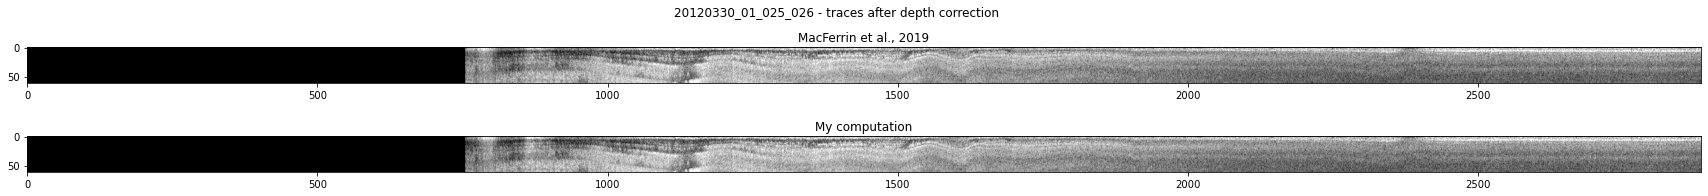

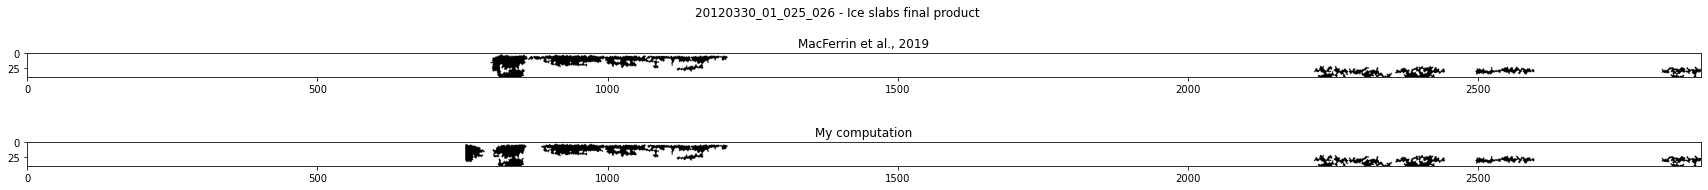

In [4]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120330_01_025_026 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20120330_01_025_026_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120330_01_025_026_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120330_01_025_026 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20120330_01_025_026_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120330_01_025_026_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2012:")
print('Traces after depth correction are almost identical. Final ice slabs result are not exactly the same.')

Let's have a look at one example for 2012:
Traces after depth correction are exactly the same. Final ice slabs result are exactly the same.


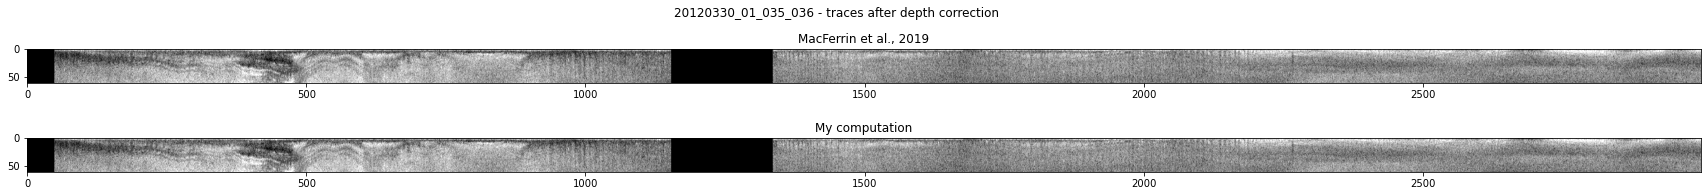

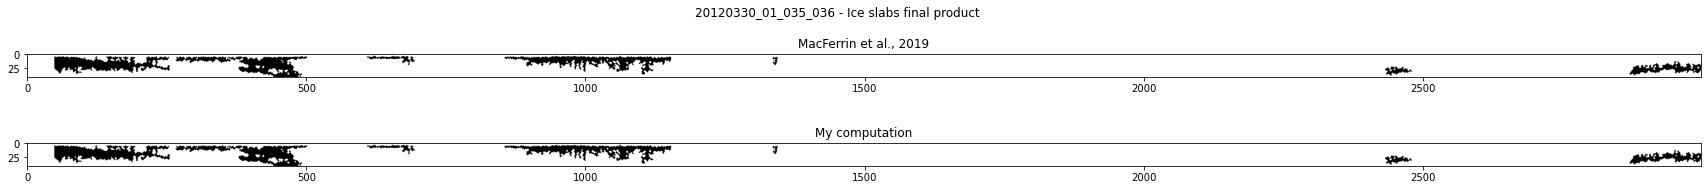

In [5]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120330_01_035_036 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20120330_01_035_036_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120330_01_035_036_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120330_01_035_036 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20120330_01_035_036_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120330_01_035_036_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2012:")
print('Traces after depth correction are exactly the same. Final ice slabs result are exactly the same.')


Let's have a look at one example for 2012:
Traces after depth correction are exactly the same. Final ice slabs result are exactly the same.


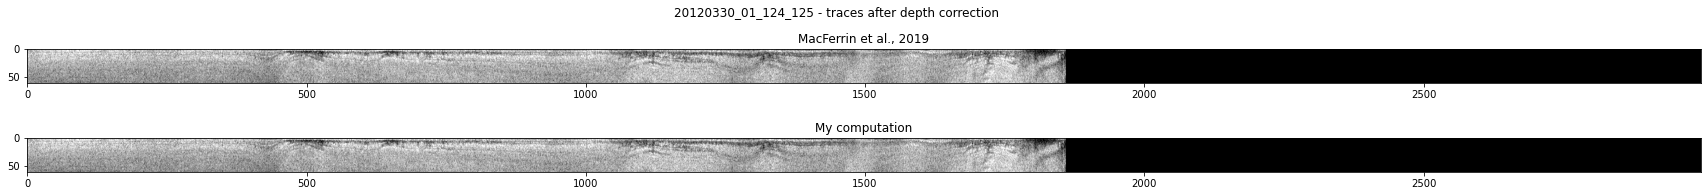

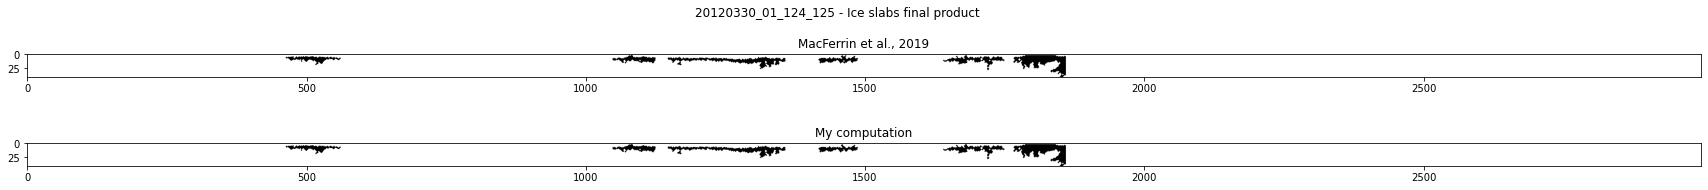

In [6]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120330_01_124_125 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20120330_01_124_125_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120330_01_124_125_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120330_01_124_125 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20120330_01_124_125_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120330_01_124_125_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2012:")
print('Traces after depth correction are exactly the same. Final ice slabs result are exactly the same.')


Let's have a look at one example for 2012:
Traces after depth correction are exactly the same. Final ice slabs result are almost exactly the same.


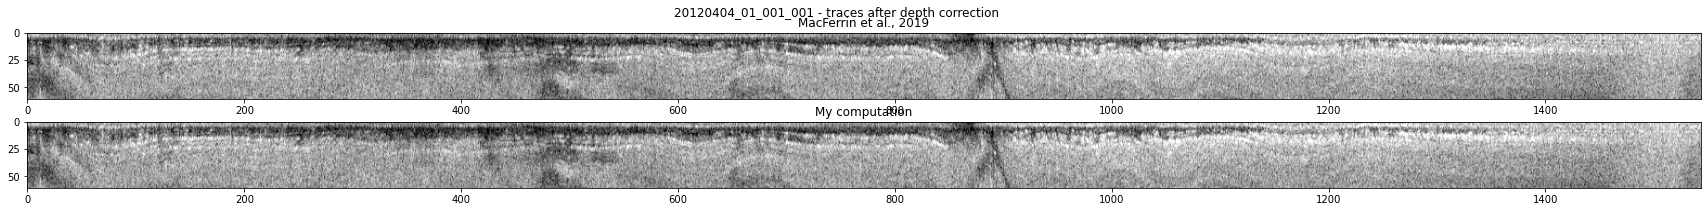

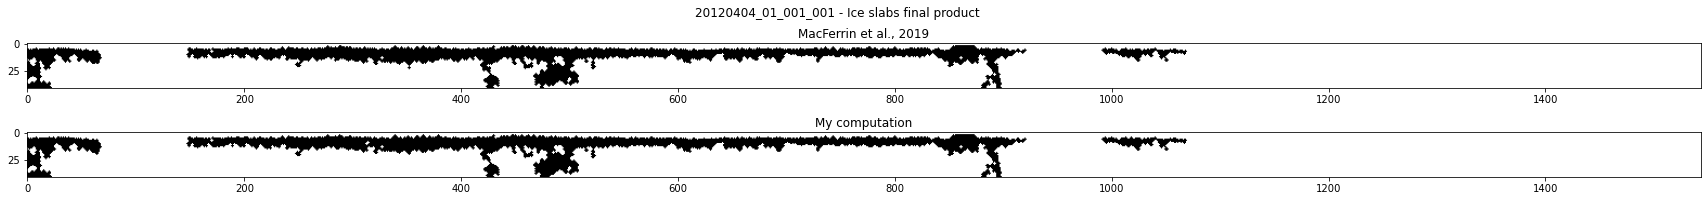

In [7]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120404_01_001_001 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20120404_01_001_001_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120404_01_001_001_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120404_01_001_001 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20120404_01_001_001_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120404_01_001_001_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2012:")
print('Traces after depth correction are exactly the same. Final ice slabs result are almost exactly the same.')

Let's have a look at one example for 2012:
Traces after depth correction are not exactly the same: I suspect a difference of performance in the roll correction. Final ice slabs result are not exactly the same.


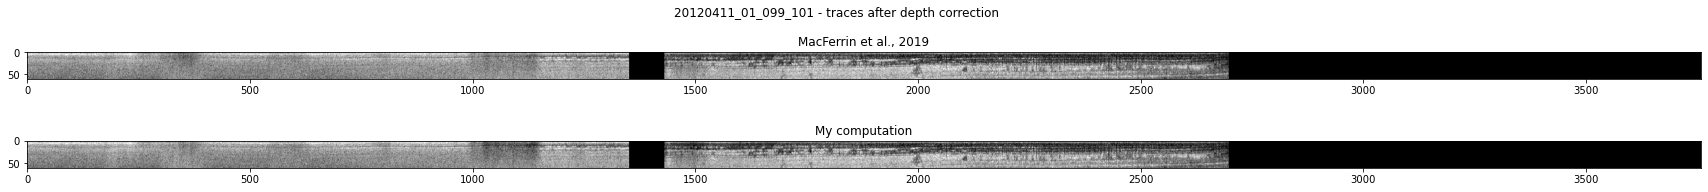

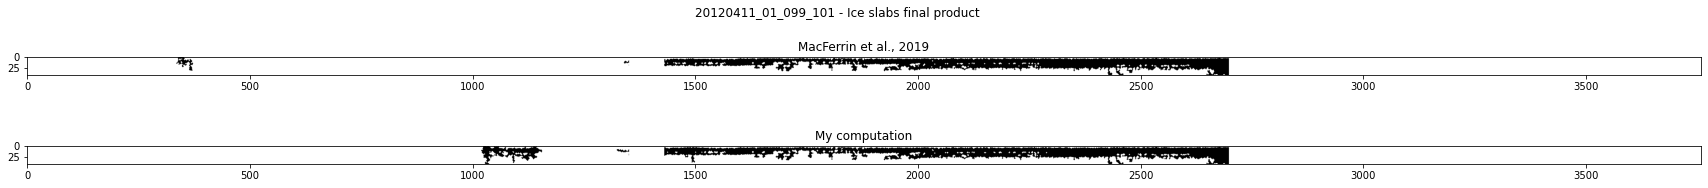

In [8]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120411_01_099_101 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20120411_01_099_101_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120411_01_099_101_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120411_01_099_101 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20120411_01_099_101_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120411_01_099_101_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2012:")
print('Traces after depth correction are not exactly the same: I suspect a difference of performance in the roll correction. Final ice slabs result are not exactly the same.')


Let's have a look at one example for 2012:
Traces after depth correction are not the same. Final ice slabs result are not exactly the same.


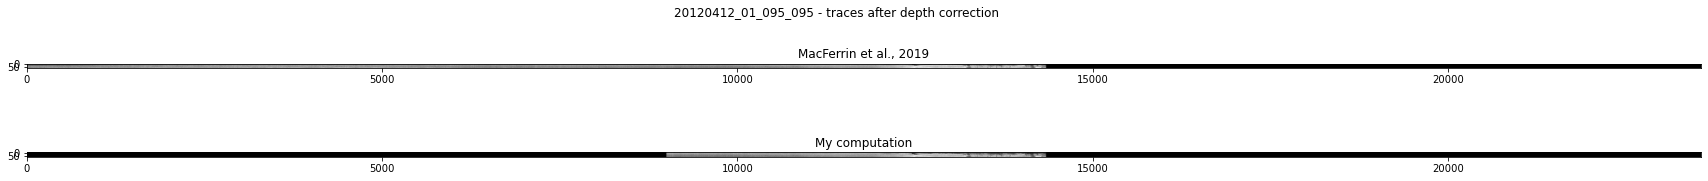

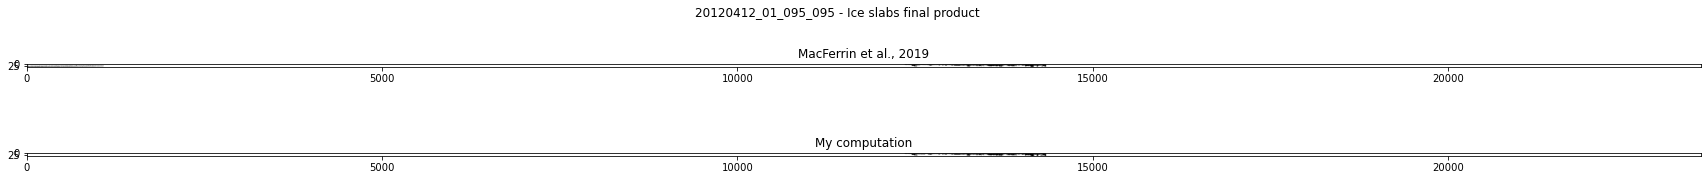

In [9]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120412_01_095_095 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20120412_01_095_095_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120412_01_095_095_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120412_01_095_095 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20120412_01_095_095_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120412_01_095_095_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2012:")
print('Traces after depth correction are not the same. Final ice slabs result are not exactly the same.')


Let's have a look at one example for 2012:
Traces after depth correction are exactly the same. Final ice slabs result are exactly the same.


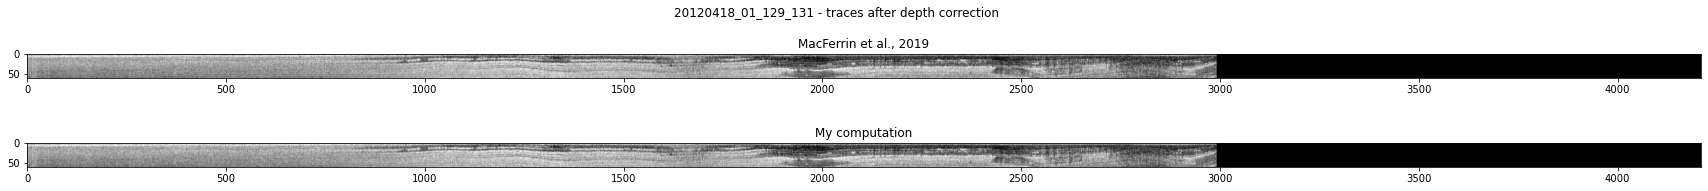

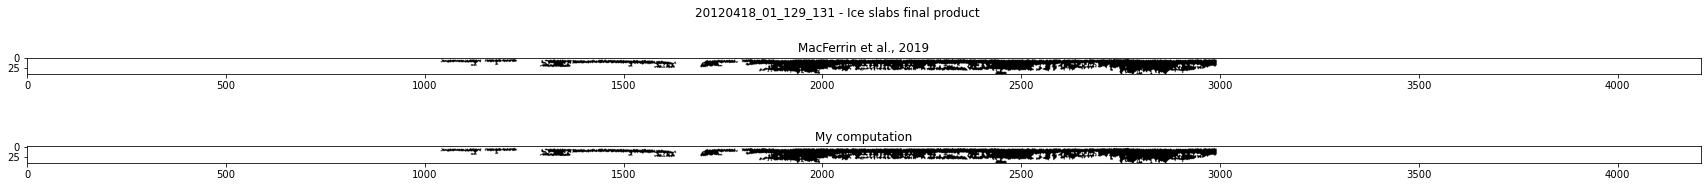

In [10]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120418_01_129_131 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20120418_01_129_131_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120418_01_129_131_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20120418_01_129_131 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20120418_01_129_131_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20120418_01_129_131_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2012:")
print('Traces after depth correction are exactly the same. Final ice slabs result are exactly the same.')


#### Conclusion about 2012: most seems to work, but there are some traces where the processing does not give the same results as MacFerrin et al., 2019.

#### 2013 examples:

Let's have a look at one example for 2013:
Traces after depth correction as well as the final ice slabs result are exactly the same!


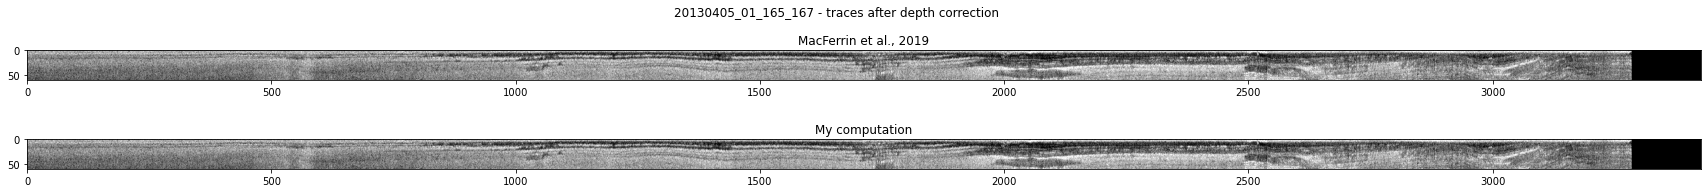

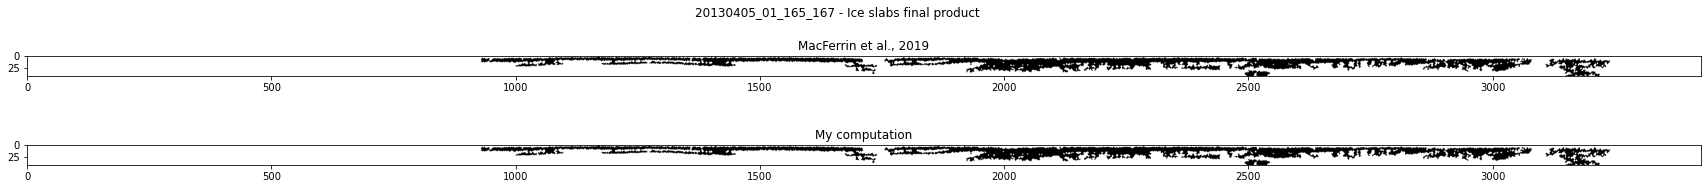

In [11]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20130405_01_165_167 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20130405_01_165_167_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20130405_01_165_167_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20130405_01_165_167 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20130405_01_165_167_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20130405_01_165_167_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2013:")
print('Traces after depth correction as well as the final ice slabs result are exactly the same!')

Let's have a look at one example for 2013:
Traces after depth correction as exactly the same . Final ice slabs result are exactly the same!


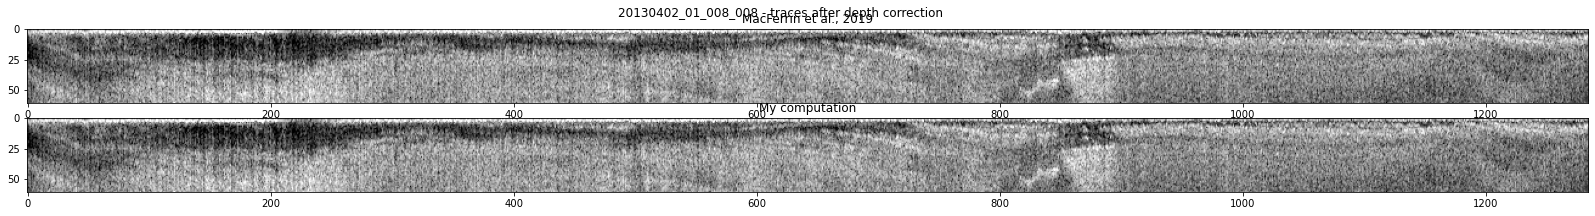

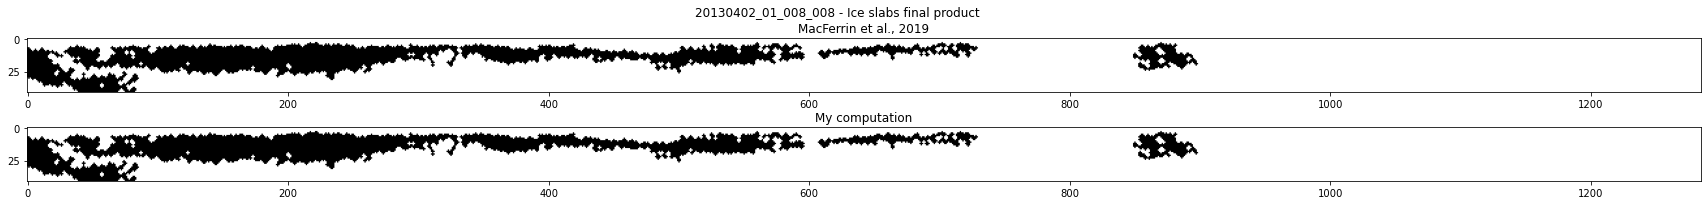

In [12]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20130402_01_008_008 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20130402_01_008_008_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20130402_01_008_008_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20130402_01_008_008 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20130402_01_008_008_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20130402_01_008_008_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2013:")
print('Traces after depth correction as exactly the same . Final ice slabs result are exactly the same!')

Let's have a look at one example for 2013:
Traces after depth correction as exactly the same . Final ice slabs result are exactly the same!


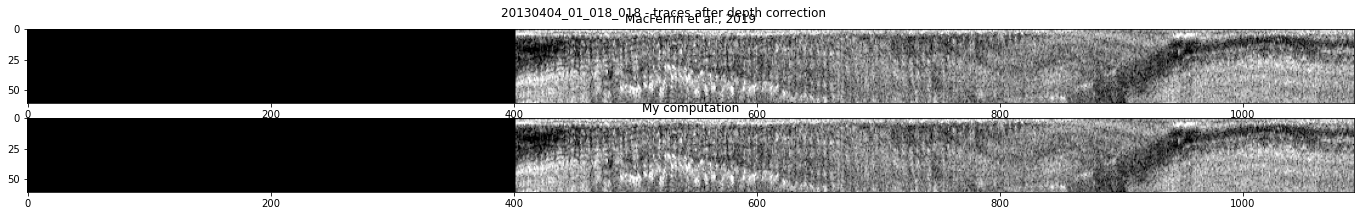

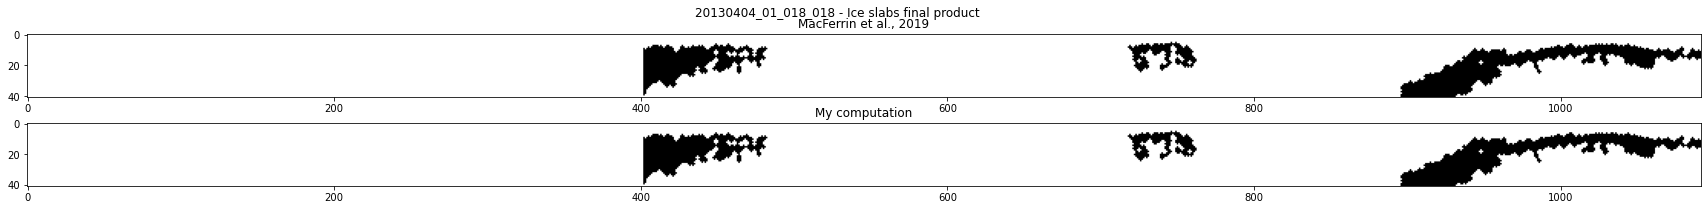

In [13]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20130404_01_018_018 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20130404_01_018_018_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20130404_01_018_018_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20130404_01_018_018 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20130404_01_018_018_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20130404_01_018_018_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2013:")
print('Traces after depth correction as exactly the same . Final ice slabs result are exactly the same!')


Let's have a look at one example for 2013:
Traces after depth correction as exactly the same . Final ice slabs result are exactly the same!


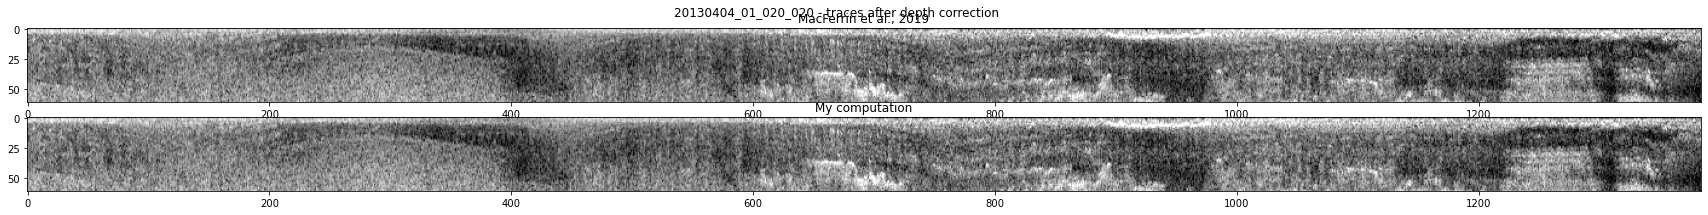

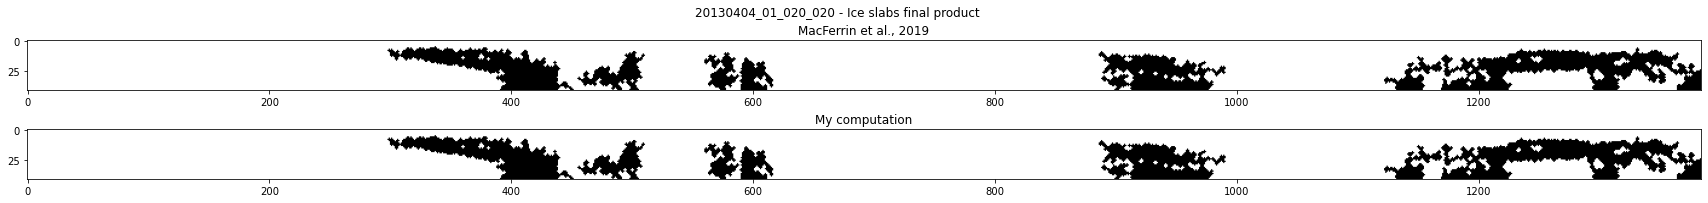

In [14]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20130404_01_020_020 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20130404_01_020_020_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20130404_01_020_020_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20130404_01_020_020 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20130404_01_020_020_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20130404_01_020_020_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2013:")
print('Traces after depth correction as exactly the same . Final ice slabs result are exactly the same!')


Let's have a look at one example for 2013:
Traces after depth correction as exactly the same . Final ice slabs result are exactly the same!


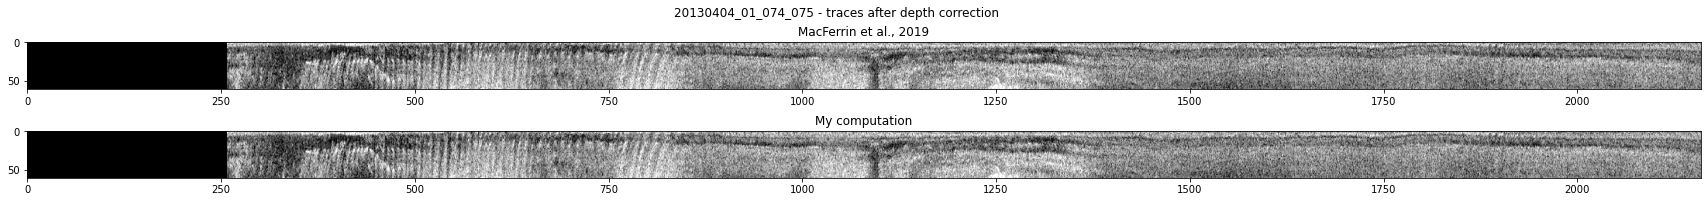

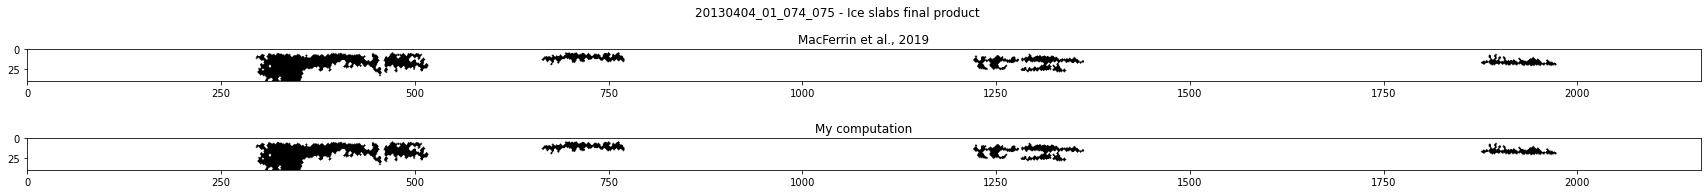

In [15]:
#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20130404_01_074_075 - traces after depth correction')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_depth_corrected+'20130404_01_074_075_1DEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20130404_01_074_075_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')


#Prepare the figure
fig, axs = plt.subplots(2,1, figsize=(30, 3), facecolor='w', edgecolor='k')
fig.suptitle('20130404_01_074_075 - Ice slabs final product')
#fig.subplots_adjust(hspace = .01, wspace=.001)
axs = axs.ravel()

#Load and plot images
axs[0].imshow(np.asarray(Image.open(path_MacFerrin_iceslabs+'20130404_01_074_075_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)
axs[1].imshow(np.asarray(Image.open(path_my_computation+'20130404_01_074_075_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")), cmap='gray', vmin=0, vmax=255)

axs[0].set_title('MacFerrin et al., 2019')
axs[1].set_title('My computation')

print("Let's have a look at one example for 2013:")
print('Traces after depth correction as exactly the same . Final ice slabs result are exactly the same!')


#### Conclusion about 2013: all of them work and give the same results as MacFerrin et al., 2019!

### 12. Fixed the issue about 2014 final ice slabs product. It was because sample_depth[0]=13 instead of 0, so for the 0-20m slice selection, the slice selected was only 7m deep (20-13=7). Now this is fixed, sample_depth[0]=0.

### 13. Ice slabs thickening

Cf. presentation I gave on the pre-lunch on Feb. 9th 2021, there are nice examples! (filename: 'prelunch_08022020.pptx')
Basically ice slabs have thickened and expanded toward higher elevations between 2010-2017.

Overlap between 2010-2014? Selection of a few traces in SW Greenland:
Overlap 2012-2013:
20130411_01_009_010
20120428_01_006_007

20130409_01_010_012
20120423_01_137_138
Might be 2014 and 2011 as well but not straight lines (bending)

Full overlap 2010-2014:

20140408_11_024_026
20120428_01_125_126
20110411_01_116_118
20100513_01_001_002

20140424_01_002_004
20130405_01_165_167
20120418_01_129_131
20110419_01_008_010
20100508_01_114_115

Additional overlaping years
20170424_01_008_012
20140421_01_009_013
20110426_01_009_011
20100507_01_008_010